In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

In [2]:
#import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [7]:
x_train /= 255
x_test /= 255

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 97s 50ms/step - loss: 0.2059 - accuracy: 0.9386
Epoch 2/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0860 - accuracy: 0.9736
Epoch 3/10
1875/1875 [==============================] - 83s 45ms/step - loss: 0.0593 - accuracy: 0.9815
Epoch 4/10
1875/1875 [==============================] - 89s 47ms/step - loss: 0.0462 - accuracy: 0.9850
Epoch 5/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0330 - accuracy: 0.9890
Epoch 6/10
1875/1875 [==============================] - 84s 45ms/step - loss: 0.0302 - accuracy: 0.9896
Epoch 7/10
1875/1875 [==============================] - 84s 45ms/step - loss: 0.0240 - accuracy: 0.9920
Epoch 8/10
1875/1875 [==============================] - 93s 49ms/step - loss: 0.0209 - accuracy: 0.9931
Epoch 9/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0201 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 99s 53m

In [10]:
 test_loss_digit, test_acc_digit=model.evaluate(x_test, y_test)
    

313/313 [==============================] - 6s 17ms/step - loss: 0.0675 - accuracy: 0.9837


1/1 [==============================] - 0s 32ms/step
6


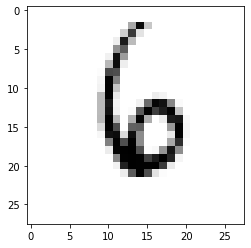

In [13]:
import matplotlib.pyplot as plt
image_index = 6900
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
predict = x_test[image_index].reshape(28,28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())


In [14]:
print('Digit MNIST Test accuracy:', round(test_acc_digit,4))

Digit MNIST Test accuracy: 0.9837


In [15]:
#Predicting the labels-DIGIT
y_predict = model.predict(x_test)

313/313 [==============================] - 5s 15ms/step


In [16]:
y_predict

array([[3.0137561e-12, 1.4724430e-11, 1.1953537e-11, ..., 1.0000000e+00,
        5.9748650e-11, 6.2508809e-10],
       [3.3461161e-09, 6.8594176e-07, 9.9999928e-01, ..., 1.3903960e-16,
        1.2083064e-15, 2.4418865e-17],
       [1.1295130e-09, 9.9999928e-01, 3.0091149e-07, ..., 1.5430878e-08,
        3.4609062e-08, 7.7370567e-12],
       ...,
       [3.6428167e-26, 1.4500260e-16, 4.8651749e-17, ..., 9.2174022e-13,
        8.0368406e-11, 4.6310208e-12],
       [1.2302046e-14, 1.0990462e-18, 1.7382066e-20, ..., 6.9678419e-18,
        2.4379787e-10, 7.9920756e-20],
       [2.5509916e-13, 5.8362846e-16, 3.2472824e-14, ..., 4.7564980e-17,
        4.4889553e-13, 6.6785313e-16]], dtype=float32)

In [17]:
y_predicts=np.argmax(y_predict, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test, axis=0)

In [18]:
y_test_digit_eval

7

In [19]:
y_predicts[8]

5

In [20]:
y_test_digit_eval

7

In [21]:
y_predicts[8]

5

In [22]:
y_test_digit_eval

7

In [23]:
y_pre=pd.DataFrame(y_predicts)

In [24]:
y_pre

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [25]:
y_test_digit_eval

7

313/313 [==============================] - 4s 13ms/step


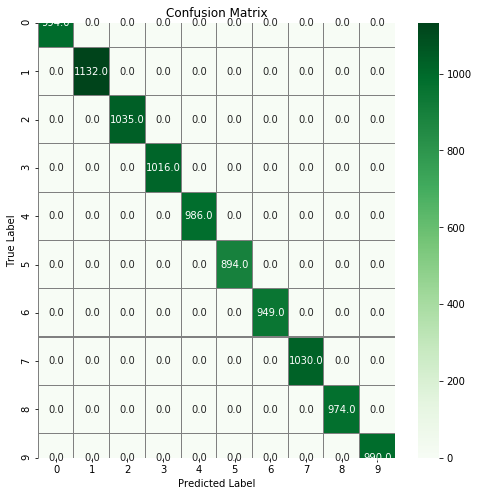

In [26]:
Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 

#Y_true = np.argmax(y_val,axis = 0) 

confusion_mtx = confusion_matrix(y_predicts, Y_pred_classes) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [27]:
from sklearn.metrics import classification_report

print(classification_report( Y_pred_classes,y_predicts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       994
           1       1.00      1.00      1.00      1132
           2       1.00      1.00      1.00      1035
           3       1.00      1.00      1.00      1016
           4       1.00      1.00      1.00       986
           5       1.00      1.00      1.00       894
           6       1.00      1.00      1.00       949
           7       1.00      1.00      1.00      1030
           8       1.00      1.00      1.00       974
           9       1.00      1.00      1.00       990

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

